# Explore here

In [1]:
import pandas as pd
import numpy as np
import importlib
import Auto_EDA as Auto_EDA
importlib.reload(Auto_EDA)

from Auto_EDA import (
    explore_data,
    clean_duplicates,
    clean_irrelevant_data,
    univariate_categorical_analysis,
    univariate_numerical_analysis,
    bivariate_numerical_analysis,
    bivariate_categorical_analysis,
    class_predictor_analysis,
    correlation_analysis,
    categorical_numerical_correlation,
    pairplot_analysis,
    analyze_outliers,
    replace_outliers,
    handle_missing_values,
    infer_new_features,
    feature_scaling,
    normalize_data,
    scale_min_max_data_1,
    feature_selection
)


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1. Exploración y limpieza

In [3]:
explore_data(df)

Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Estadísticas descriptivas:
(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Conclusiones:



### 1.1 Quitar Duplicados

In [4]:
clean_duplicates(df)

Registros duplicados eliminados: 0


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Conclusiones:


### 1.2 Eliminar información innecesaria

In [5]:
clean_irrelevant_data(df)

Columnas irrelevantes eliminadas: []


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 2. Análisis de variables Univariadas

### 2.1 Varbiables categóricas

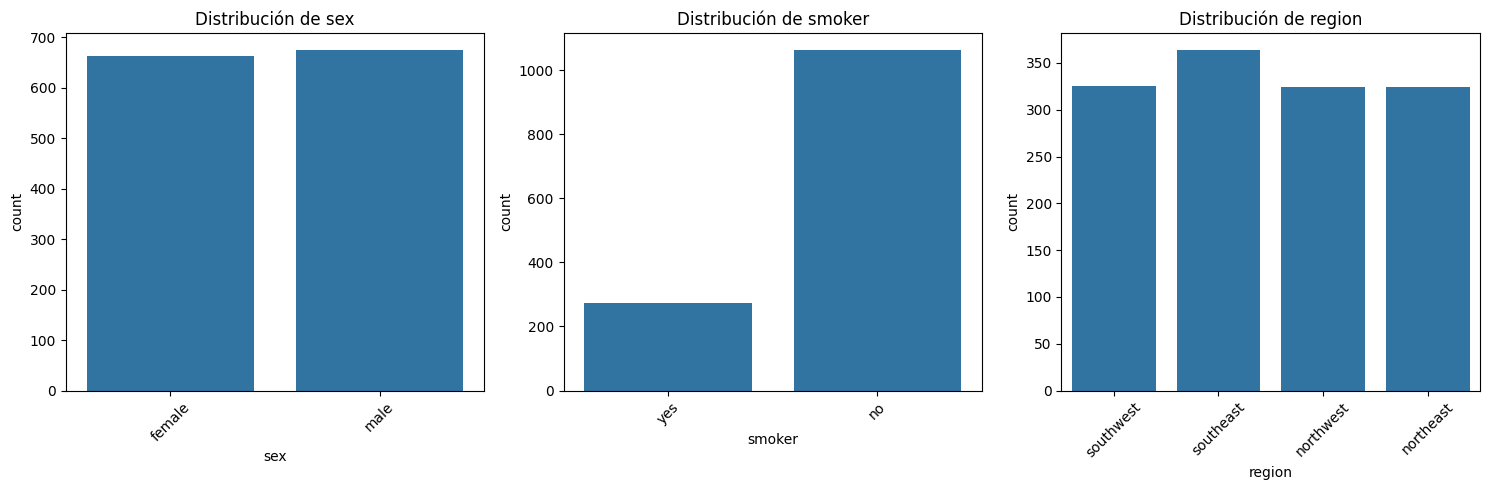

In [6]:
univariate_categorical_analysis(df)

Conclusiones


### 2.2 Variables Numéricas

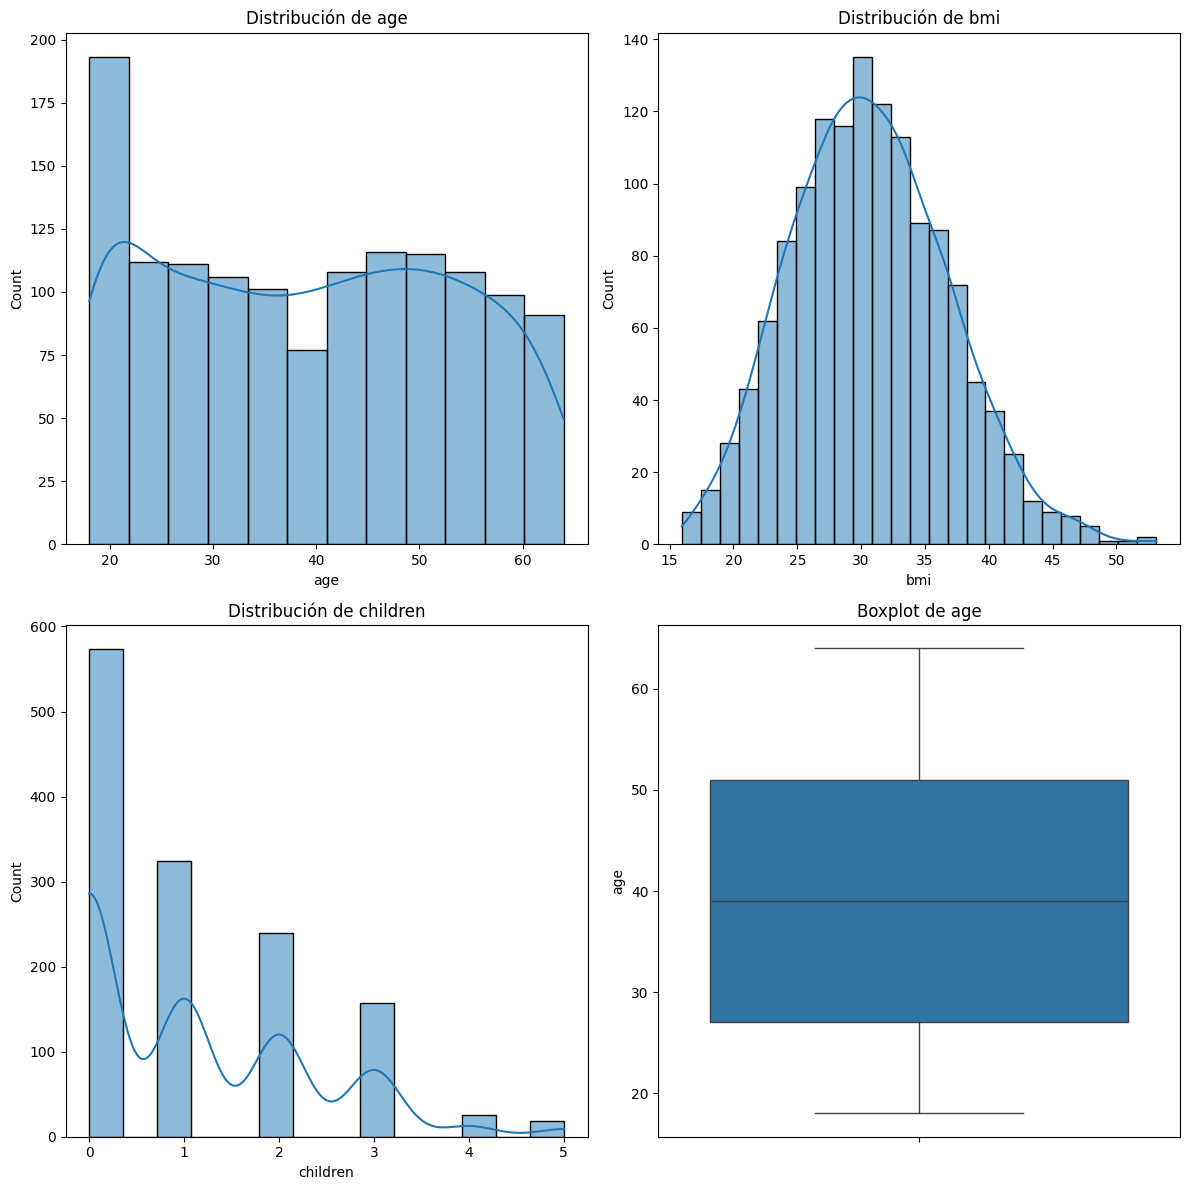

In [7]:
univariate_numerical_analysis(df)

Conclusiones:



## 3. Análisis de variables multivariante

### 3.1 Numérico-numérico

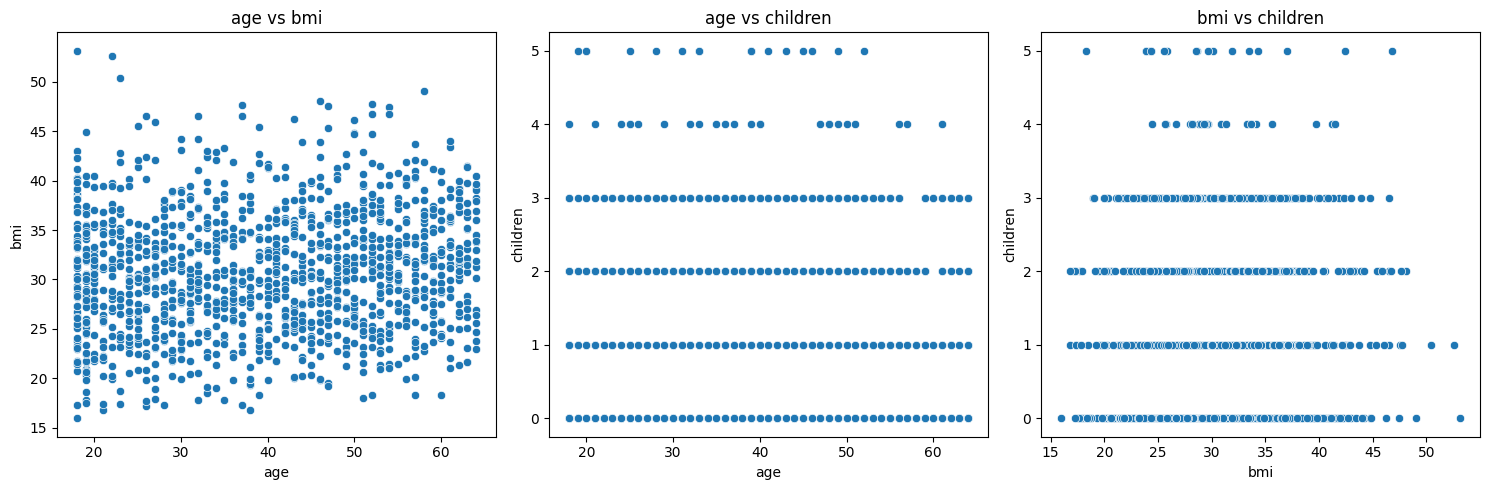

In [8]:
bivariate_numerical_analysis(df)

Conclusiones



### 3.2 Categótico-categórico

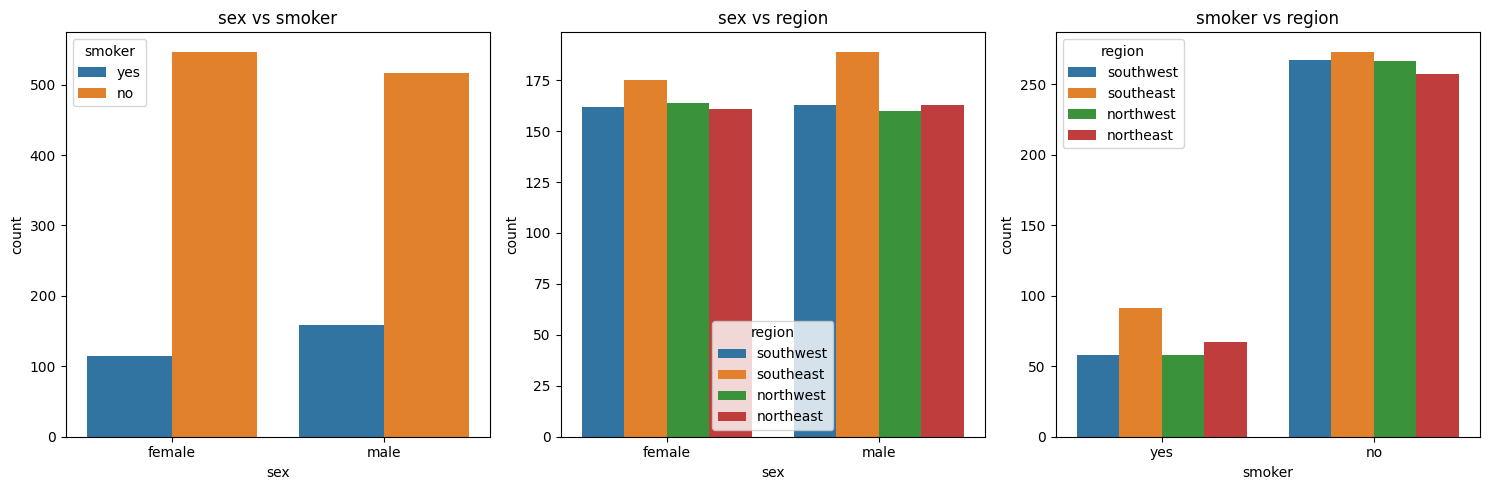

In [9]:
bivariate_categorical_analysis(df)

Conclusiones:


### 3.3 Combinaciones de la clase con varias predictoras

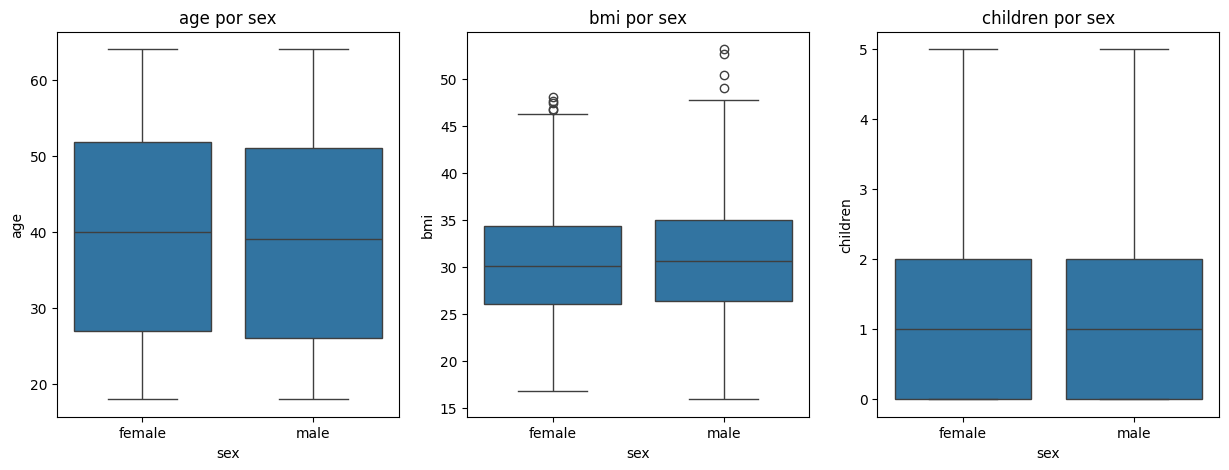

In [10]:
class_predictor_analysis(df)

Conclusiones:

### 3.4 Análisis de correlaciones

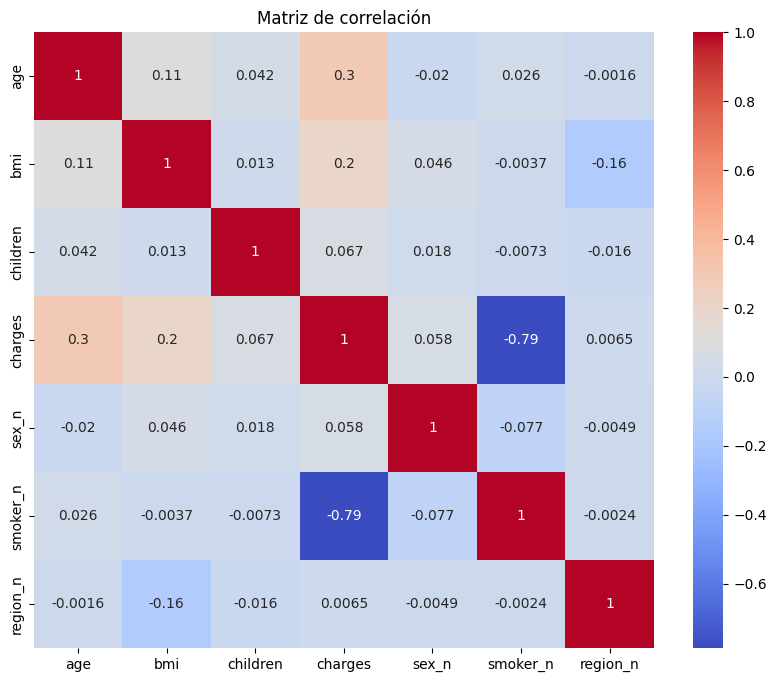

In [11]:
correlation_analysis(df)

Conclusiones:



### 3.5 Categórico-numérico

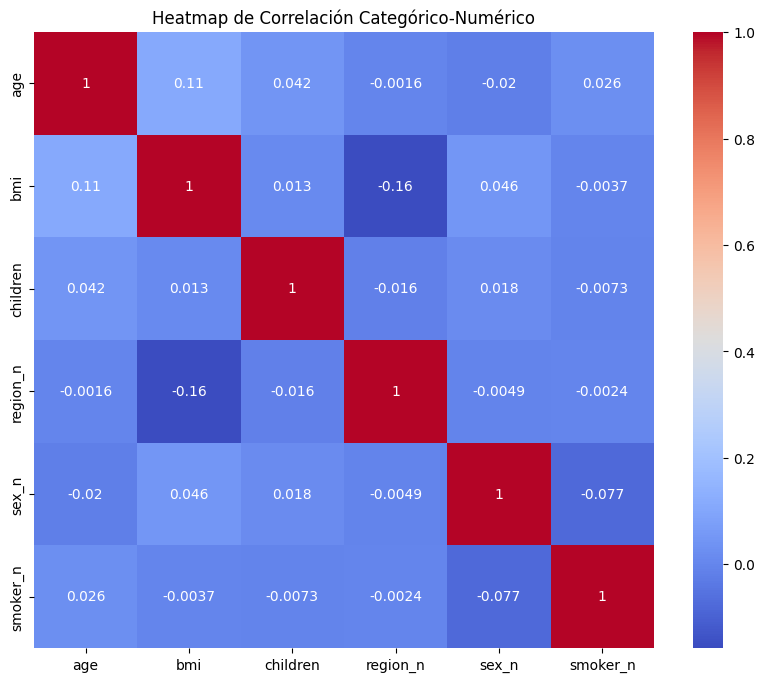

In [12]:
categorical_numerical_correlation(df)

Conclusiones:


## 4. Análisis de toda la data en una

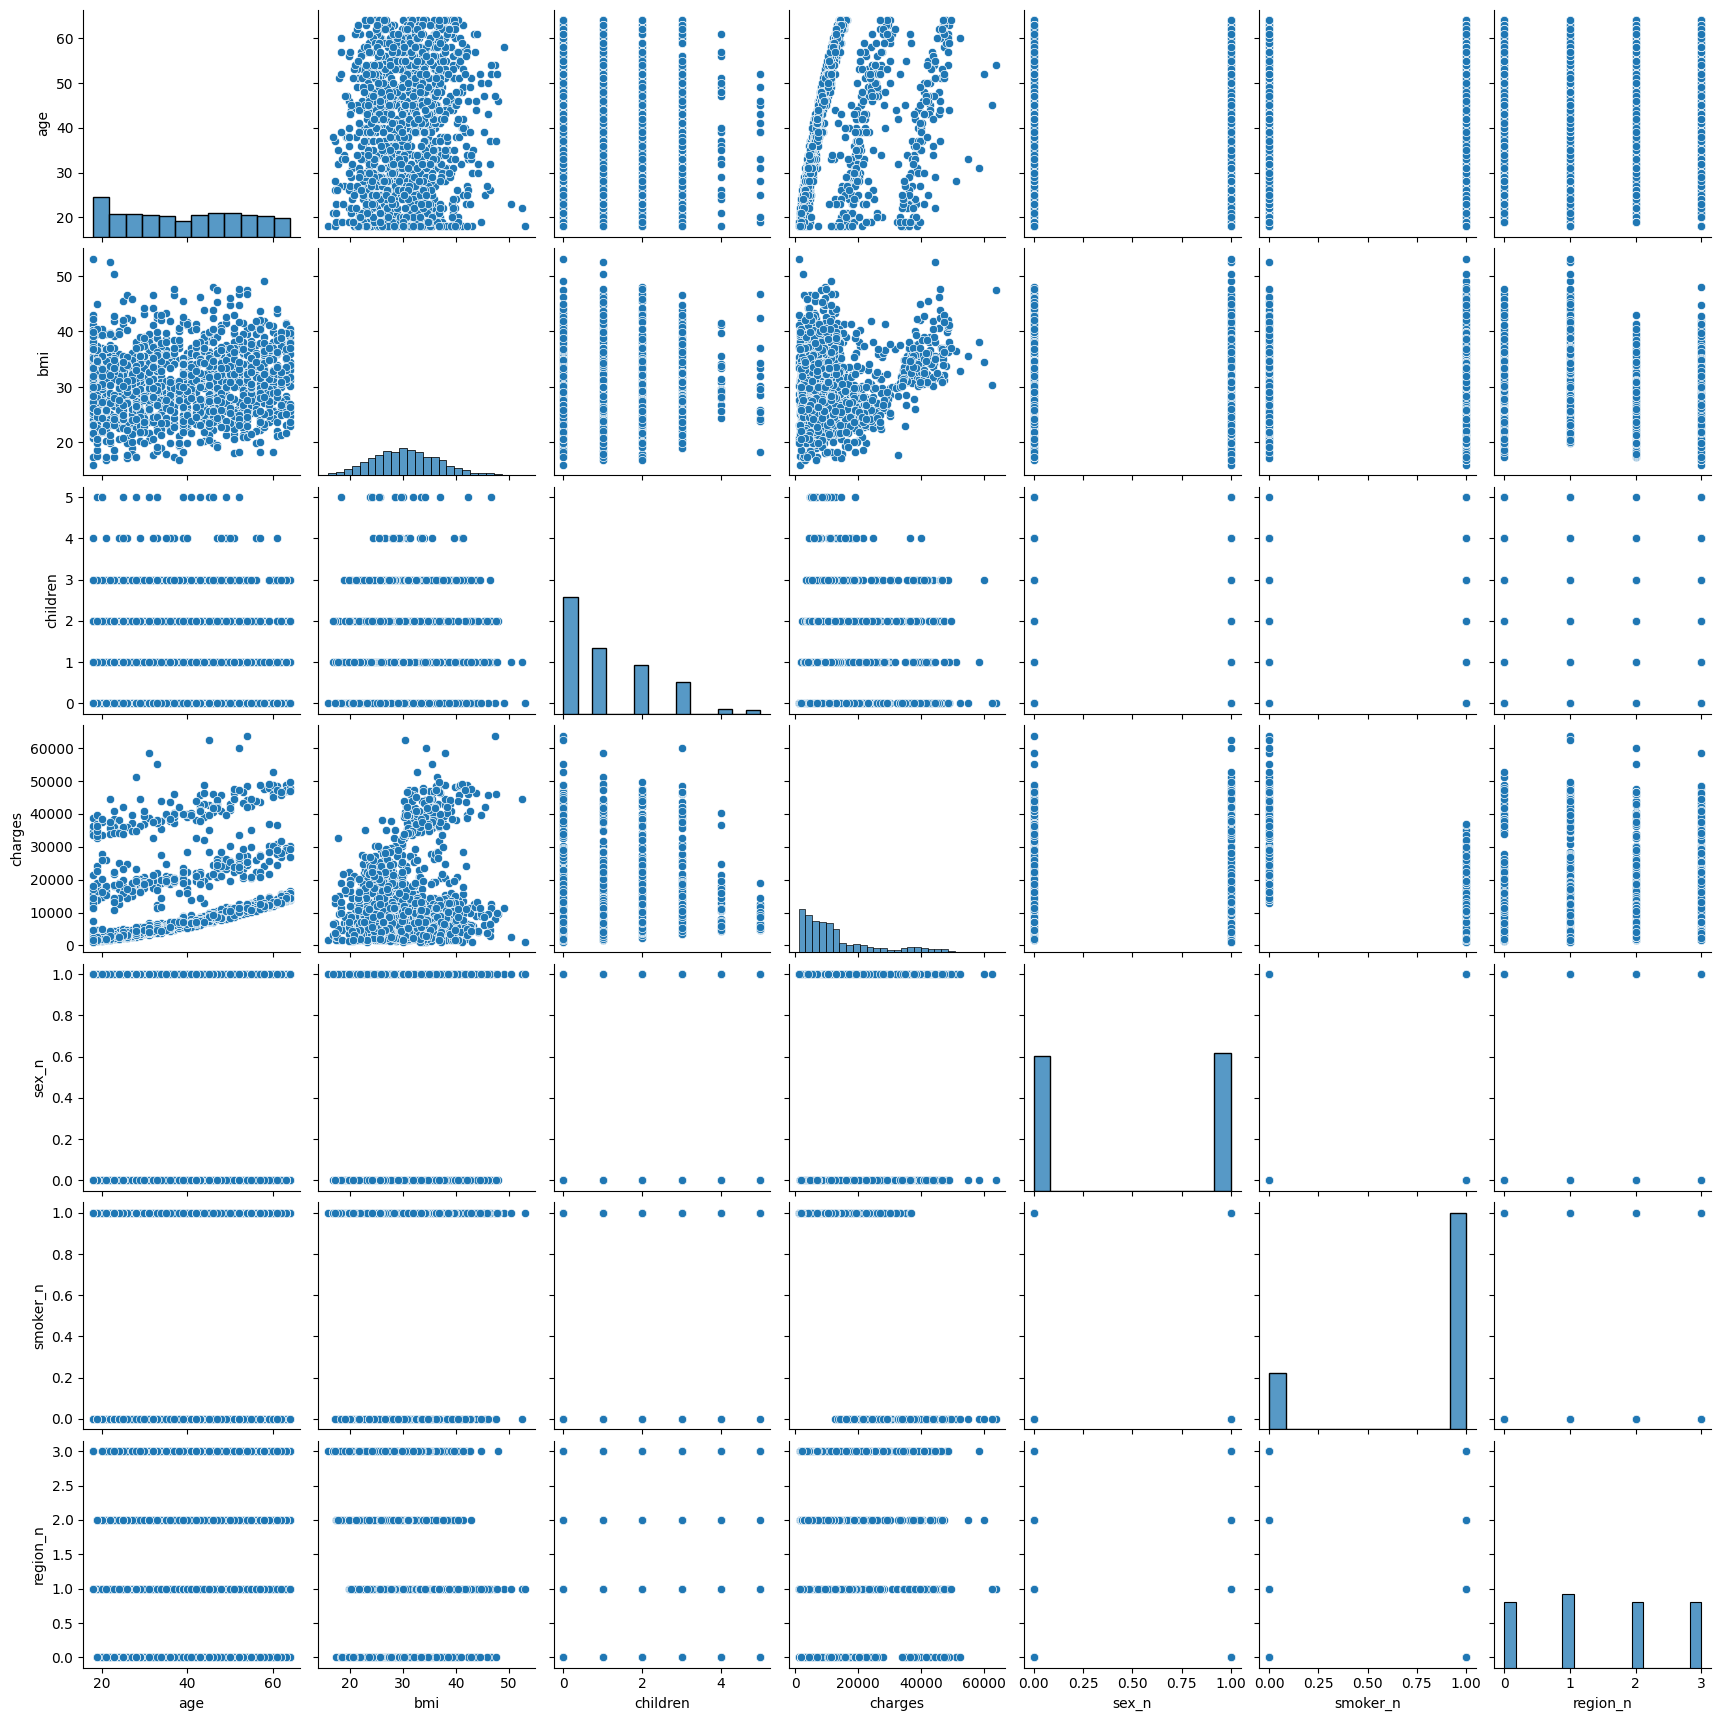

In [13]:
pairplot_analysis(df)

## 5. Feature Engineering

### 5.1 Análisis Outliers

In [14]:
df.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


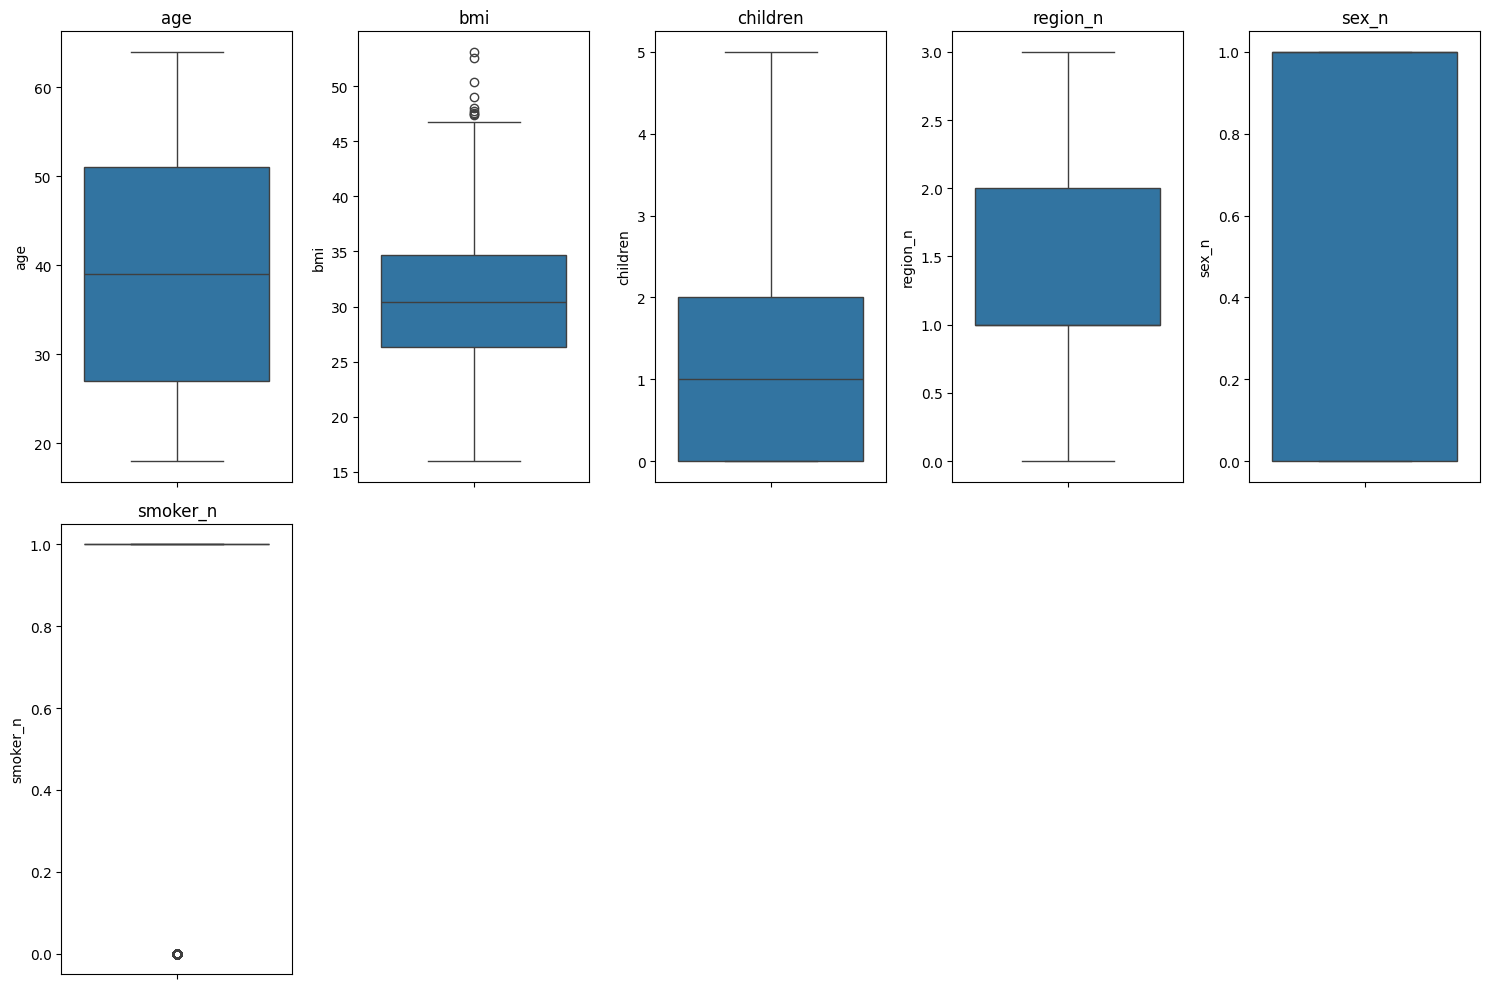

In [15]:
df_sin_outliers, numerical_cols = analyze_outliers(df)

In [16]:
df_sin_outliers = replace_outliers(df_sin_outliers, numerical_cols)


{'age': [18.0, 87.0], 'bmi': [13.674999999999994, 47.31500000000001], 'children': [0.0, 5.0], 'region_n': [0.0, 3.5], 'sex_n': [0.0, 2.5], 'smoker_n': [1.0, 1.0]}


### 5.2  Anáisis de valores faltantes

In [17]:
handle_missing_values(df_sin_outliers)

Valores faltantes por columna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

Valores faltantes después de la imputación:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64


,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,1.0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1.0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1.0,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1.0,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1.0,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1.0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1.0,0


Conclusiones: 


### 5.3 Inferencia de nuevas caraterísticas

In [18]:
infer_new_features(df_sin_outliers)

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,1.0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1.0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1.0,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1.0,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1.0,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1.0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1.0,0


No hay columnas en el DF que pueda aplicarse para la inferencia de nuevas características

## 6. Feature Scalling

In [19]:
X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, y_train, y_test, numerical_cols= feature_scaling(df, df_sin_outliers)


Archivos creados: X_train_con_outliers.xlsx, X_train_sin_outliers.xlsx, X_test_con_outliers.xlsx, X_test_sin_outliers.xlsx, y_train.xlsx, y_test.xlsx


### 6.1 Normalización

In [20]:
X_train_con_outliers_norm, X_test_con_outliers_norm, X_train_sin_outliers_norm, X_test_sin_outliers_norm = normalize_data(X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, numerical_cols)

Archivos creados: X_train_con_outliers_norm.xlsx, X_test_con_outliers_norm.xlsx, X_train_sin_outliers_norm.xlsx, X_test_sin_outliers_norm.xlsx


### 6.2 Escalado Mínimo-Máximo

In [21]:

X_train_con_outliers_scal, X_test_con_outliers_scal, X_train_sin_outliers_scal, X_test_sin_outliers_scal = scale_min_max_data_1(X_train_con_outliers, X_test_con_outliers, X_train_sin_outliers, X_test_sin_outliers, numerical_cols)

DataFrames escalados, modelos guardados y archivos XLSX creados.


## 7. Feature Selection

### 7.1 Selección de Características

In [22]:
feature_selection(X_train_con_outliers_norm, X_train_sin_outliers_norm, X_test_con_outliers_norm, X_test_sin_outliers_norm, X_train_con_outliers_scal, X_train_sin_outliers_scal, X_test_con_outliers_scal, X_test_sin_outliers_scal, y_train, y_test)

Características seleccionadas: ['bmi', 'children', 'region_n', 'sex_n', 'smoker_n', 'charges']


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


(           bmi  children  region_n  sex_n  smoker_n      charges
 0     0.230024       0.0  1.000000    1.0       1.0   2396.09590
 1     0.263250       0.4  1.000000    1.0       1.0   3279.86855
 2     0.580172       0.4  0.666667    0.0       1.0  33471.97189
 3     0.686306       0.0  0.333333    1.0       1.0  13405.39030
 4     0.286252       0.4  1.000000    0.0       1.0   9715.84100
 ...        ...       ...       ...    ...       ...          ...
 1064  0.511165       0.4  1.000000    0.0       0.0  44641.19740
 1065  0.805488       0.4  0.000000    1.0       1.0   3693.42800
 1066  0.162497       0.2  0.000000    1.0       1.0   1964.78000
 1067  0.323917       0.6  0.000000    0.0       1.0   7151.09200
 1068  0.535378       0.4  0.333333    0.0       1.0   5836.52040
 
 [1069 rows x 6 columns],
           bmi  children  region_n     sex_n  smoker_n      charges
 0   -1.334950 -0.907908  1.383946  0.971409       0.0   8688.85885
 1   -0.820801  2.441716 -1.333944 -1.029432